In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import warnings
import random
warnings.filterwarnings("ignore")


In [2]:
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')
spy = pd.read_csv('SPY.csv')

## Data preprocessing

### Convert column name to perspective column name

In [3]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907
1,2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,49716.191406,96721152926
2,2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453
3,2021-05-15,49855.496094,50639.664063,46664.140625,46760.187500,46760.187500,59161047474
4,2021-05-16,46716.636719,49720.042969,43963.351563,46456.058594,46456.058594,64047871555


In [5]:
#Check for any missing data
print(btc.isna().sum())
print(eth.isna().sum())
print(spy.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
for i in btc.columns:
    if i != 'Date':
        btc['btc' +i] = btc[i]
        btc = btc.drop(i, axis = 1)

In [7]:
for i in eth.columns:
    if i != 'Date':
        eth['eth' +i] = eth[i]
        eth = eth.drop(i, axis = 1)

In [8]:
for i in spy.columns:
    if i != 'Date':
        spy['spy' +i] = spy[i]
        spy = spy.drop(i, axis = 1)

In [9]:
eth.columns

Index(['Date', 'ethOpen', 'ethHigh', 'ethLow', 'ethClose', 'ethAdj Close',
       'ethVolume'],
      dtype='object')

In [10]:
spy.columns

Index(['Date', 'spyOpen', 'spyHigh', 'spyLow', 'spyClose', 'spyAdj Close',
       'spyVolume'],
      dtype='object')

In [11]:
btc.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume
0,2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907
1,2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,49716.191406,96721152926
2,2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453
3,2021-05-15,49855.496094,50639.664063,46664.140625,46760.187500,46760.187500,59161047474
4,2021-05-16,46716.636719,49720.042969,43963.351563,46456.058594,46456.058594,64047871555


In [12]:
eth.head()

,Date,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume
0,2021-05-12,4174.635742,4362.350586,3785.848633,3785.848633,3785.848633,69023382175
1,2021-05-13,3828.918457,4032.563477,3549.407227,3715.148438,3715.148438,78398214539
2,2021-05-14,3720.122314,4171.017090,3703.399902,4079.057373,4079.057373,48174271215
3,2021-05-15,4075.951660,4129.185547,3638.122070,3638.122070,3638.122070,42422321751
4,2021-05-16,3641.830811,3878.895996,3350.951660,3587.506104,3587.506104,47359478734


https://realpython.com/pandas-merge-join-and-concat/

In [13]:
### When merged, around 600 or 30% of data got lost
df = pd.merge(btc, eth, on = ["Date"])

In [14]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume
0,2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907,4174.635742,4362.350586,3785.848633,3785.848633,3785.848633,69023382175
1,2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,49716.191406,96721152926,3828.918457,4032.563477,3549.407227,3715.148438,3715.148438,78398214539
2,2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453,3720.122314,4171.017090,3703.399902,4079.057373,4079.057373,48174271215
3,2021-05-15,49855.496094,50639.664063,46664.140625,46760.187500,46760.187500,59161047474,4075.951660,4129.185547,3638.122070,3638.122070,3638.122070,42422321751
4,2021-05-16,46716.636719,49720.042969,43963.351563,46456.058594,46456.058594,64047871555,3641.830811,3878.895996,3350.951660,3587.506104,3587.506104,47359478734


In [15]:
df = pd.merge(df, spy, on = ['Date'])

In [16]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907,4174.635742,4362.350586,3785.848633,3785.848633,3785.848633,69023382175,411.230011,412.589996,404.000000,405.410004,387.861145,134811000
1,2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,49716.191406,96721152926,3828.918457,4032.563477,3549.407227,3715.148438,3715.148438,78398214539,407.070007,412.350006,407.019989,410.279999,392.520325,106394000
2,2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453,3720.122314,4171.017090,3703.399902,4079.057373,4079.057373,48174271215,413.209991,417.489990,413.179993,416.579987,398.547577,82201600
3,2021-05-17,46415.898438,46623.558594,42207.289063,43537.511719,43537.511719,74903638450,3581.343018,3587.765625,3129.008789,3282.397705,3282.397705,54061732774,415.390015,416.390015,413.359985,415.519989,397.533508,65129200
4,2021-05-18,43488.058594,45812.457031,42367.832031,42909.402344,42909.402344,56187365084,3276.872314,3562.465088,3246.404053,3380.070068,3380.070068,40416525218,415.799988,416.059998,411.769989,411.940002,394.108521,59810200


In [17]:
btc.shape

(1097, 7)

In [18]:
spy.shape

(755, 7)

In [19]:
df.shape

(755, 19)

In [20]:
# Remove all string value for convertion Date to float
dateColumn = df["Date"]
df["Date"] = df["Date"].str.replace("-",'')
df["Date"] = pd.to_numeric(df['Date'], errors='coerce',downcast="integer")

In [21]:
print(df.dtypes)

Date              int32
btcOpen         float64
btcHigh         float64
btcLow          float64
btcClose        float64
btcAdj Close    float64
btcVolume         int64
ethOpen         float64
ethHigh         float64
ethLow          float64
ethClose        float64
ethAdj Close    float64
ethVolume         int64
spyOpen         float64
spyHigh         float64
spyLow          float64
spyClose        float64
spyAdj Close    float64
spyVolume         int64
dtype: object


In [22]:
df.head(10)

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,20210512,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907,4174.635742,4362.350586,3785.848633,3785.848633,3785.848633,69023382175,411.230011,412.589996,404.000000,405.410004,387.861145,134811000
1,20210513,49735.433594,51330.843750,46980.019531,49716.191406,49716.191406,96721152926,3828.918457,4032.563477,3549.407227,3715.148438,3715.148438,78398214539,407.070007,412.350006,407.019989,410.279999,392.520325,106394000
2,20210514,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453,3720.122314,4171.017090,3703.399902,4079.057373,4079.057373,48174271215,413.209991,417.489990,413.179993,416.579987,398.547577,82201600
3,20210517,46415.898438,46623.558594,42207.289063,43537.511719,43537.511719,74903638450,3581.343018,3587.765625,3129.008789,3282.397705,3282.397705,54061732774,415.390015,416.390015,413.359985,415.519989,397.533508,65129200
4,20210518,43488.058594,45812.457031,42367.832031,42909.402344,42909.402344,56187365084,3276.872314,3562.465088,3246.404053,3380.070068,3380.070068,40416525218,415.799988,416.059998,411.769989,411.940002,394.108521,59810200
5,20210519,42944.976563,43546.117188,30681.496094,37002.441406,37002.441406,126358098747,3382.657227,3437.935791,1952.460205,2460.679199,2460.679199,84482912776,406.920013,411.049988,405.329987,410.859985,393.075165,106467100
6,20210520,36753.667969,42462.984375,35050.617188,40782.738281,40782.738281,88281943359,2439.638672,2993.145264,2170.229004,2784.294189,2784.294189,67610826680,411.799988,416.630005,411.670013,415.279999,397.303894,78022200
7,20210521,40596.949219,42172.171875,33616.453125,37304.691406,37304.691406,82051616861,2772.341309,2938.205078,2113.347168,2430.621338,2430.621338,53774070802,416.869995,418.200012,414.450012,414.940002,396.978638,76578700
8,20210524,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,67359584098,2099.936035,2672.595703,2090.639648,2643.591064,2643.591064,53697121740,417.339996,420.320007,417.079987,419.170013,401.025543,51376700
9,20210525,38795.781250,39776.351563,36581.429688,38402.222656,38402.222656,56211915803,2649.033203,2750.534912,2394.355469,2706.628906,2706.628906,49558333256,420.329987,420.709991,417.619995,418.239990,400.135773,57451400


Correlation Coefficient: 0.9114172087800294


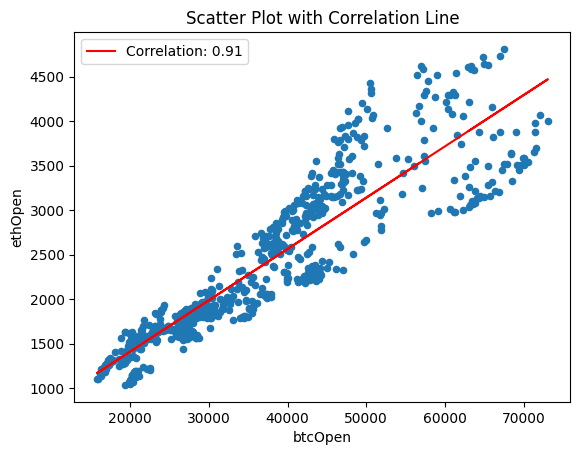

In [23]:
# Create a scatter plot
df.plot.scatter(x = 'btcOpen', y = 'ethOpen');

correlation = df['btcOpen'].corr(df['ethOpen'])
print('Correlation Coefficient: ' + str(correlation))

x = df['btcOpen']
y = df['ethOpen']

# Calculate the correlation coefficient
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color='red', linestyle='-', label=f'Correlation: {correlation:.2f}')

# Add labels and legend
plt.xlabel('btcOpen')
plt.ylabel('ethOpen')
plt.title('Scatter Plot with Correlation Line')
plt.legend()

# Show the plot
plt.show()

Correlation Coefficient: 0.8462960733580508


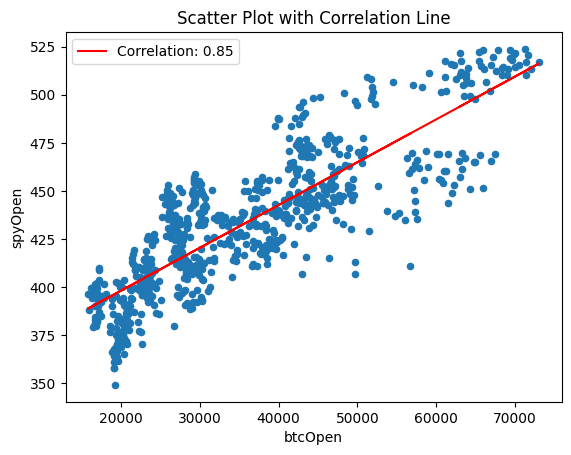

In [24]:
# Create a scatter plot
df.plot.scatter(x = 'btcOpen', y = 'spyOpen');

correlation = df['btcOpen'].corr(df['spyOpen'])
print('Correlation Coefficient: ' + str(correlation))

x = df['btcOpen']
y = df['spyOpen']

# Calculate the correlation coefficient
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color='red', linestyle='-', label=f'Correlation: {correlation:.2f}')

# Add labels and legend
plt.xlabel('btcOpen')
plt.ylabel('spyOpen')
plt.title('Scatter Plot with Correlation Line')
plt.legend()

# Show the plot
plt.show()

### Utils for updating data sets 

In [25]:
class Utils:
    
    def _updateTrainingData(self, x_train):
        for i in x_train.columns:
            if i != 'Date':
                x_train['yesterday_' +i] = x_train[i]
                x_train['twoDaysAgo_' +i] = x_train[i]
                x_train['threeDaysAgo_' +i] = x_train[i]
                x_train['fourDaysAgo_' +i] = x_train[i]
                x_train['fiveDaysAgo_' +i] = x_train[i]
                x_train['sixDaysAgo_' +i] = x_train[i]
                x_train['sevenDaysAgo_' +i] = x_train[i]
                x_train['yesterday_' +i] = x_train['yesterday_' +i].shift(1)
                x_train['twoDaysAgo_' +i] = x_train['twoDaysAgo_' +i].shift(2)
                x_train['threeDaysAgo_' +i] = x_train['threeDaysAgo_' +i].shift(3)
                x_train['fourDaysAgo_' +i] = x_train['fourDaysAgo_' +i].shift(4)
                x_train['fiveDaysAgo_' +i] = x_train['fiveDaysAgo_' +i].shift(5)
                x_train['sixDaysAgo_' +i] = x_train['sixDaysAgo_' +i].shift(6)
                x_train['sevenDaysAgo_' +i] = x_train['sevenDaysAgo_' +i].shift(7)
                x_train = x_train.drop(i, axis = 1)
        return x_train
    
    def _updateDate(x_train):
        dates = x_train['Date']
        #Convert each date to the format YYYY-MM-DD
        formatted_dates = [datetime.strptime(str(int(date)), '%Y%m%d').strftime('%Y-%m-%d') for date in dates]
        df = pd.DataFrame({"Date": formatted_dates})
        return df
    
    def _replaceNanY(self, y_train):
        column_means_7days =  y_train.tail(7).mean()
        df_filled = y_train_btcHigh.fillna(column_means_7days)
        y_train = df_filled
        
        return y_train
    
    def _replaceNanX(x_train):
        column_means = x_train.mean()
        df_filled = x_train.fillna(column_means)
        x_train = df_filled
        
        return x_train
    
    def _newTrainingData(new_row, x_train):
        index = len(x_train)
        x_train.loc[index] = new_row
        x_train_temp = x_train
        return x_train_temp

    
    def _newTrainLabel(self, y_train):
        column_means_7days = y_train.tail(7).mean()
        new_row = pd.Series({'btcHigh': column_means_7days})
        y_train_temp = y_train.append(new_row, ignore_index=True)
        return y_train_temp
    
    
    

### Pedictor class to call predictor model

In [26]:
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

class Predictor: 
    
    model = LinearRegression()
    utils = Utils()
    X_ = []
    
    #Y predictions
    highPredictions = []
    lowPredictions = []
    openPredictions = []
    closePredictions = []
    highPredictionsTest = []
    
    #Y actual
    highActual = []
    lowActual = []
    openActual = []
    closeActual = []
    highActualTest = []
    
    
    #training data
    high_train = []
    low_train = []
    close_train = []
    open_train = []
    
    #test data
    high_test = []
    
    
    
    def __init__(self, X):
        self.X = X
        Predictor.X_ = self.X
    
    def _split(X, ratio, random_state):
        header = X.columns
        # remove header for shuffling 
        x_data = X.values

        random.seed(random_state)
        train_ratio = ratio
        test_ratio = 1 - train_ratio
        
        total_data_sample = len(X)
        train_samples = int(total_data_sample * train_ratio)
        test_samples = total_data_sample - train_samples

        random.shuffle(x_data)
        shuffled_data = pd.DataFrame(x_data, columns=header)

        train_data = shuffled_data.head(train_samples)
        test_data = shuffled_data.head(test_samples)
        
        return train_data, test_data
    
    def getHighPredictions(self):
        return Predictor.highPredictions
        
    def getLowPredictions(self):
        return Predictor.lowPredictions
    
    def getClosePredictions(self):
        return Predictor.closePredictions
        
    def getOpenPredictions(self):
        return Predictor.openPredictions
    
    def getHighActual(self):
        return Predictor.highActual
        
    def getLowActual(self):
        return Predictor.lowActual
    
    def getCloseActual(self):
        return Predictor.closeActual
        
    def getOpenActual(self):
        return Predictor.openActual
    
    def getHighTrain(self):
        return Predictor.high_train
    
    def getLowTrain(self):
        return Predictor.low_train
    
    def getCloseTrain(self):
        return Predictor.close_train
    
    def getOpenTrain(self):
        return Predictor.open_train
    
    
    #Test Data
    def getHighTestPredictions(self):
        return Predictor.highPredictionsTest
    
    def getHighTestActual(self):
        return Predictor.highActualTest
    
    def getHighTest(self):
        return Predictor.high_test
        
    
    def _predictWithLinearRegression(self, date=None):
        
        if (date!=None): 
            self.X = Utils._newTrainingData({'Date': date}, self.X)
            Predictor.X_ = self.X
            
        train_data, test_data, = Predictor._split(self.X, ratio=0.7, random_state=123 )
        
        
        #Predict high using training data
        X_train_btcHigh = train_data.drop(columns=['btcHigh'])
        X_train_btcHigh = Utils._replaceNanX(X_train_btcHigh)
        y_train_btcHigh = train_data['btcHigh']
        Predictor.model.fit(X_train_btcHigh, y_train_btcHigh)
        y_pred_btcHigh = Predictor.model.predict(X_train_btcHigh)
        
        #Predict high using test data
        X_test_btcHigh = test_data.drop(columns=['btcHigh'])
        X_test_btcHigh = Utils._replaceNanX(X_test_btcHigh)
        y_test_btcHigh = test_data['btcHigh']
        Predictor.model.fit(X_test_btcHigh, y_test_btcHigh)
        y_test_pred_btcHigh = Predictor.model.predict(X_test_btcHigh)
        
        # Predict Low
        X_train_btcLow = train_data.drop(columns=['btcLow'])
        X_train_btcLow = Utils._replaceNanX(X_train_btcLow)
        y_train_btcLow = train_data['btcLow']
        Predictor.model.fit(X_train_btcLow, y_train_btcLow)
        y_pred_btcLow = Predictor.model.predict(X_train_btcLow)
        
        # Predict Open
        X_train_btcOpen = train_data.drop(columns=['btcOpen'])
        X_train_btcOpen = Utils._replaceNanX(X_train_btcOpen)
        y_train_btcOpen = train_data['btcOpen']
        Predictor.model.fit(X_train_btcOpen, y_train_btcOpen)
        y_pred_btcOpen = Predictor.model.predict(X_train_btcOpen)
        
        # Predict Close
        X_train_btcClose = train_data.drop(columns=['btcClose'])
        X_train_btcClose = Utils._replaceNanX(X_train_btcClose)
        y_train_btcClose = train_data['btcClose']
        Predictor.model = LinearRegression()
        Predictor.model.fit(X_train_btcClose, y_train_btcClose)
        y_pred_btcClose = Predictor.model.predict(X_train_btcClose)
        
        
        #Assigned the training data values to global vairables
        Predictor.high_train = Utils._updateDate(X_train_btcHigh)
        Predictor.low_train = Utils._updateDate(X_train_btcLow)
        Predictor.open_train = Utils._updateDate(X_train_btcOpen)
        Predictor.close_train = Utils._updateDate(X_train_btcClose)
        Predictor.high_test = Utils._updateDate(X_test_btcHigh)
        
        #Convert array of predictions to dataframe
        y_pred_btcHigh = pd.DataFrame(y_pred_btcHigh)
        y_pred_btcLow = pd.DataFrame(y_pred_btcLow)
        y_pred_btcOpen = pd.DataFrame(y_pred_btcOpen)
        y_pred_btcClose = pd.DataFrame(y_pred_btcClose)
        y_test_pred_btcHigh = pd.DataFrame(y_test_pred_btcHigh)
        
        #Assigned the predicted values to global vairables
        Predictor.highPredictions = y_pred_btcHigh
        Predictor.lowPredictions = y_pred_btcLow
        Predictor.openPredictions = y_pred_btcOpen
        Predictor.closePredictions = y_pred_btcClose
        Predictor.highPredictionsTest = y_test_pred_btcHigh
        
        #Assigned the actual values to global vairables
        Predictor.highActual = y_train_btcHigh
        Predictor.lowActual = y_train_btcLow
        Predictor.openActual = y_train_btcOpen
        Predictor.closeActual = y_train_btcClose
        Predictor.highActualTest = y_test_btcHigh
        
        #Assigned the variable to the predictions by the given date
        y_pred_btcHigh_ = y_pred_btcHigh.iloc[-1:].iloc[-1:].values.flatten()
        y_pred_btcLow_ = y_pred_btcLow.iloc[-1:].iloc[-1:].values.flatten()
        y_pred_btcOpen_ = y_pred_btcOpen.iloc[-1:].iloc[-1:].values.flatten()
        y_pred_btcClose_ = y_pred_btcClose.iloc[-1:].iloc[-1:].values.flatten()
        
        
        return self.X, y_pred_btcHigh_[0], y_pred_btcLow_[0], y_pred_btcOpen_[0],y_pred_btcClose_[0]

        

### Make predictions

In [27]:
X = df

#Use the predictor class to run predictions
predictor = Predictor(X)
X = predictor._predictWithLinearRegression()


#Actual values 
y_high = predictor.getHighActual()
y_low = predictor.getLowActual()
y_open = predictor.getOpenActual()
y_close = predictor.getCloseActual()

#Predicted values
high_predictions = predictor.getHighPredictions()
low_predictions = predictor.getLowPredictions()
open_predictions = predictor.getOpenPredictions()
close_predictions = predictor.getClosePredictions()

#Get all training data
high_train = predictor.getHighTrain()
low_train = predictor.getLowTrain()
open_train = predictor.getOpenTrain()
close_train = predictor.getCloseTrain()


### Train Data - Predicted VS Actual 

In [28]:
from sklearn.metrics import r2_score
r2_score(high_predictions, y_high)

#The close the value to 1 the better the predictions

0.9989547948705563

<function matplotlib.pyplot.show(close=None, block=None)>

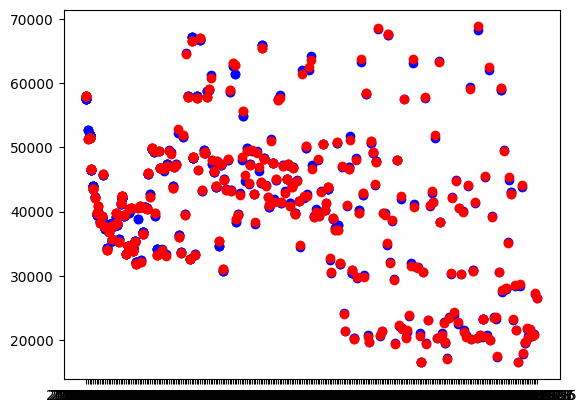

In [29]:
import matplotlib.pyplot as plt
plt.scatter(high_train['Date'], high_predictions, color = 'b')
plt.scatter(high_train['Date'], y_high, color = 'r')
plt.show

### Test Data - Predicted VS Actual 

In [30]:
from sklearn.metrics import r2_score

high_predictions_test = predictor.getHighTestPredictions()
y_high_test = predictor.getHighTestActual()

r2_score(high_predictions_test, y_high_test)

#The close the value to 1 the better the predictions

0.9975574490683855

###  Predict the BTC future high price

In [31]:
from datetime import datetime, timedelta
today = datetime.now().date()

tomorrow = (today + timedelta(days=1)).strftime('%Y-%m-%d')
secondDay = (today + timedelta(days=2)).strftime('%Y-%m-%d')

X = df
predictor = Predictor(X)

In [32]:
#The is appended in the XO without the prediction for high, low, open, close
X0, predHigh, predLow, predOpen, predClose  = predictor._predictWithLinearRegression(tomorrow)

#So we'll need to create a new row for the predicted high, low, open, close
new_row = {'Date': tomorrow, 'btcHigh':predHigh, 'btcLow':predLow, 'btcOpen':predOpen, 'btcClose':predClose }

#Drop the last row because it onlt contains the date
X0.drop(X0.index[-1], inplace=True)

#After dropping the last row append the prediction
i = len(X0)
X0.loc[i] = new_row

In [33]:
#Drop the other columns only keep 'Date', 'btcHigh', 'btcLow', 'btcOpen', 'btcClose'
columns_to_keep = ['Date', 'btcHigh', 'btcLow', 'btcOpen', 'btcClose']    # Specify the columns you want to keep
#Drop the other columns
columns_to_drop = [col for col in X0.columns if col not in columns_to_keep]
X0.drop(columns=columns_to_drop, inplace=True)
X0

,Date,btcOpen,btcHigh,btcLow,btcClose
0,20210512,56714.531250,57939.363281,49150.535156,49150.535156
1,20210513,49735.433594,51330.843750,46980.019531,49716.191406
2,20210514,49682.980469,51438.117188,48868.578125,49880.535156
3,20210517,46415.898438,46623.558594,42207.289063,43537.511719
4,20210518,43488.058594,45812.457031,42367.832031,42909.402344
...,...,...,...,...,...
751,20240507,63162.761719,64390.457031,62285.980469,62334.816406
752,20240508,62332.640625,62986.085938,60877.128906,61187.941406
753,20240509,61191.199219,63404.914063,60648.074219,63049.960938
754,20240510,63055.191406,63446.742188,60208.781250,60792.777344
